# _Trial 5 for [APTOS](https://www.kaggle.com/c/aptos2019-blindness-detection) Blindness Detection Kaggle Competition_

Work Started on August 16, 2019

In [0]:
# update pytorch and fastai to latest versions
!pip install torch -U
!pip install torchvision -U
!pip install fastai -U 
!pip install kaggle

In [0]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [0]:
# mount your google drive so you can save to it
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
os.getcwd()

'/content'

In [0]:
os.chdir('/content/gdrive/My Drive/projects/')

In [0]:
os.getcwd()

'/content/gdrive/My Drive/projects'

In [0]:
os.listdir()

['blindness_detection']

In [0]:
os.listdir('blindness_detection/')

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models',
 'trial1_aptos.ipynb',
 'trial2_aptos.ipynb']

In [0]:
os.chdir('blindness_detection/')

In [0]:
from pathlib import Path

#create path variable to primary directory
path = Path(os.getcwd())
path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection')

In [0]:
# make a dataframe from train.csv
train_df = pd.read_csv(path/'train.csv')
# make a dataframe from test.csv
test_df = pd.read_csv(path/'test.csv')

In [0]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [0]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [0]:
# create a dictionary for the varying levels of diabetic retinopathy
dr_dict = {0: 'No DR', # no diabetic retinopathy,
           1: 'Mild', # mild case of diabetic retinopathy,
           2: 'Moderate', # moderate level of diabetic retinopathy
           3: 'Severe', # severe case of diabetic retinopathy
           4: 'Proliferative DR' # worst case scenario
          }

In [0]:
# create target column that generates more descriptive labels vs. integer values
train_df['target'] = train_df['diagnosis'].map(dr_dict)

In [0]:
train_df.tail()

,id_code,diagnosis,target
3657,ffa47f6a7bf4,2,Moderate
3658,ffc04fed30e6,0,No DR
3659,ffcf7b45f213,2,Moderate
3660,ffd97f8cd5aa,0,No DR
3661,ffec9a18a3ce,2,Moderate


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 3 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
target       3662 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [0]:
# convert target column to categorical type
train_df['target'] = train_df['target'].astype('category')

In [0]:
# drop diagnosis column
train_df.drop(labels='diagnosis', axis=1, inplace=True)

In [0]:
train_df.head()

,id_code,target
0,000c1434d8d7,Moderate
1,001639a390f0,Proliferative DR
2,0024cdab0c1e,Mild
3,002c21358ce6,No DR
4,005b95c28852,No DR


In [0]:
# import deep learning libraries
import torch
import fastai
from fastai import *
from fastai.vision import *

data = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=320,
                              bs=16))

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Moderate,No DR,No DR,Proliferative DR,Moderate
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: None

In [0]:
# add test set
data.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [0]:
data

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Moderate,No DR,No DR,Proliferative DR,Moderate
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: LabelList (1928 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train

### _Create Learner and Model Training_

In [0]:
# create Kappa Score metric
kappa = KappaScore()
kappa.weights = "quadratic"

In [0]:
learn = cnn_learner(data, models.resnet50,
                    metrics=[error_rate, kappa],
                    pretrained=True,
                    bn_final=True,
                    path=path/'models')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 26.9MB/s]


In [0]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [0]:
# load weights from previous round of training from trial 2 (best performing model)
learn.load(path/'models/models/trial2-rd4');

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 7.59E-04


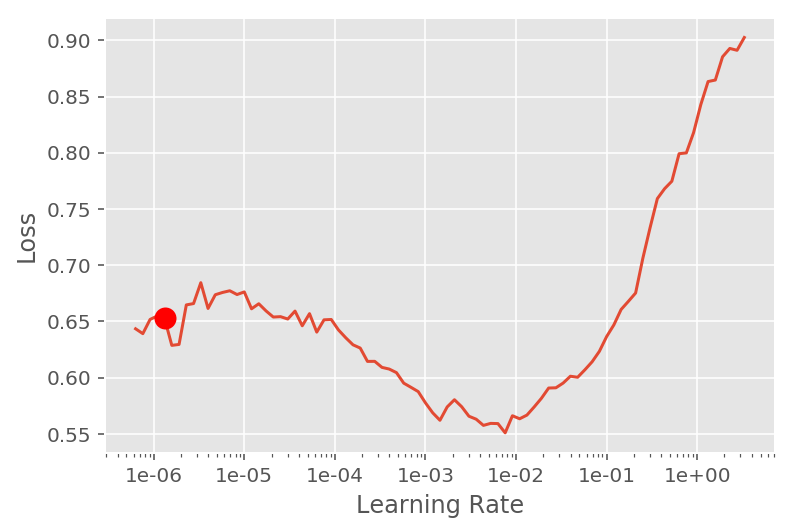

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr = 5.5e-4
lr

0.00055

In [0]:
from fastai.callbacks import SaveModelCallback

learn.fit_one_cycle(5, slice(lr), callbacks=[(SaveModelCallback(learn, 
                                                                every='improvement', 
                                                                monitor='kappa_score', 
                                                                name='trial5-rd1'))])

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.613657,0.533752,0.198087,0.513837,18:07
1,0.552711,0.508645,0.178962,0.549340,08:31
2,0.533144,0.495439,0.174863,0.567973,08:22
3,0.484175,0.501626,0.185792,0.520551,08:20
4,0.510629,0.489011,0.173497,0.541561,08:24


Better model found at epoch 0 with kappa_score value: 0.5138371586799622.
Better model found at epoch 1 with kappa_score value: 0.5493398904800415.
Better model found at epoch 2 with kappa_score value: 0.5679731369018555.


In [0]:
# load weights from previous round of training
learn.load(path/'models/models/trial5-rd1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


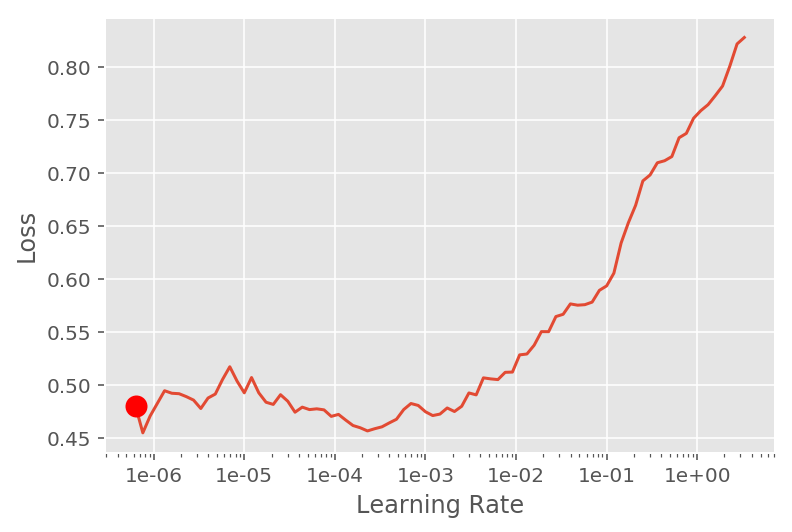

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-06
Min loss divided by 10: 3.98E-05


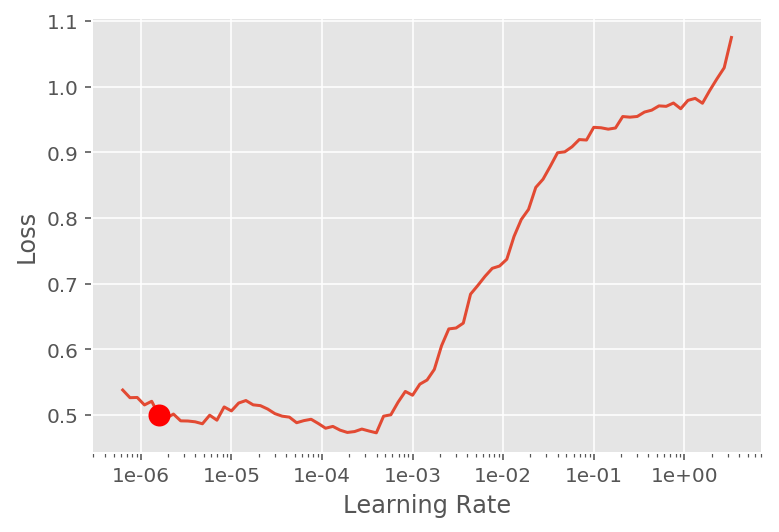

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-05
Min loss divided by 10: 7.59E-08


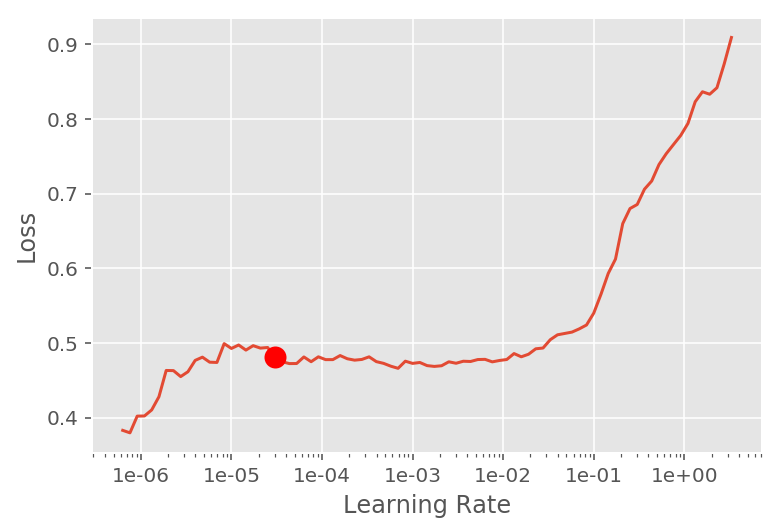

In [0]:
learn.recorder.plot(suggestion=True)

### _Increase Image Size to 364_

In [0]:
data_384 = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=384,
                              bs=16))

data_384.normalize(imagenet_stats)

# add test set
data_384.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [0]:
learn.data = data_384

In [0]:
# load weights from previous round of training
learn.load(path/'models/models/trial5-rd1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-06
Min loss divided by 10: 6.31E-08


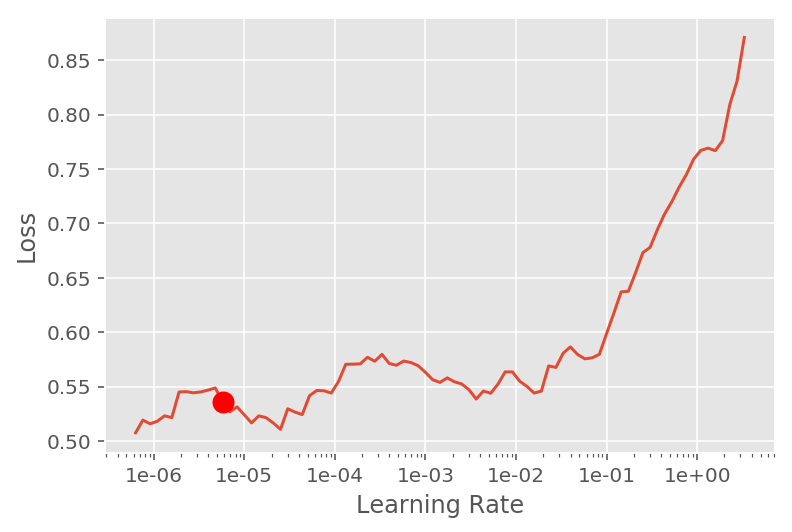

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr = learn.recorder.min_grad_lr
lr

5.754399373371569e-06

In [0]:
learn.fit_one_cycle(5, slice(lr), callbacks=[(SaveModelCallback(learn, 
                                                                every='improvement', 
                                                                monitor='kappa_score', 
                                                                name='trial5-rd2'))])

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.572315,0.472390,0.173497,0.581283,09:04
1,0.577461,0.469435,0.170765,0.589106,09:04
2,0.570043,0.467237,0.174863,0.562529,09:05
3,0.552989,0.470314,0.172131,0.576249,09:06
4,0.538735,0.472915,0.178962,0.564331,09:06


Better model found at epoch 0 with kappa_score value: 0.581283450126648.
Better model found at epoch 1 with kappa_score value: 0.5891056060791016.


### _Increase Image Size to 448_

In [0]:
data_448 = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=448,
                              bs=8))

data_448.normalize(imagenet_stats)

# add test set
data_448.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [0]:
learn.data = data_448

In [0]:
# load weights from previous round of training
learn.load(path/'models/models/trial5-rd2');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 2.09E-06


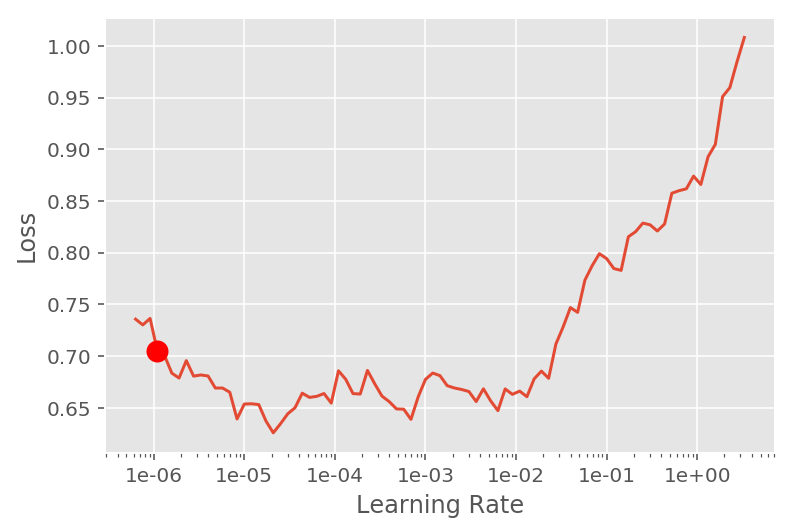

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 2.29E-05


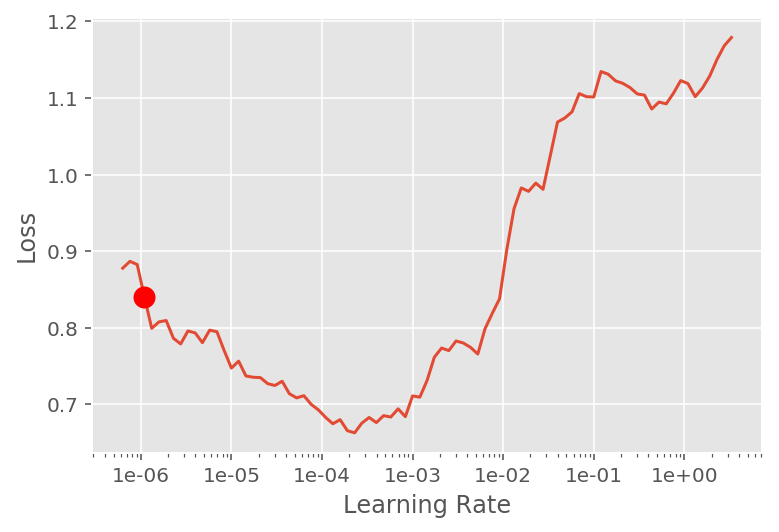

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5, slice(9e-6), callbacks=[(SaveModelCallback(learn, 
                                                                every='improvement', 
                                                                monitor='kappa_score', 
                                                                name='trial5-rd3'))])

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.704010,0.537611,0.215847,0.529271,10:05
1,0.647445,0.515455,0.198087,0.586786,10:09
2,0.639580,0.503867,0.193989,0.578559,10:08
3,0.609179,0.505132,0.193989,0.558894,10:14
4,0.639683,0.507250,0.200820,0.554854,10:15


Better model found at epoch 0 with kappa_score value: 0.5292706489562988.
Better model found at epoch 1 with kappa_score value: 0.5867859721183777.


### _Random Thoughts_

The first thing that I need to address the training time...this is taking **way** too long. This Medium [article](https://medium.com/@oribarel/getting-the-most-out-of-your-google-colab-2b0585f82403) looks like it might provide some value in this particular realm. What I need to do is set up a new Colab notebook and go through the code and see what happens. It does make sense that the connection between my Google Drive and the learner may be a root cause of the lag but I can't say for sure at this point. 

Another thing that I need to talk about is what I'm going to do next. Yes, I still need to do my technical mock interview for Springboard. Also, I need to start prepping my presentation for Springboard Rise. What is your main goal? Do youi really want to just sit up there and regurgitate? Or do you want to tell a story?